In [1]:
import numpy as np

# Generate 3 dimensional clusters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce


def generate_data(means=None, sigmas=None, n_features = 10, n_rows = 10000):
    
    if means is None:
        means = np.random.uniform(size=n_features)
    if sigmas is None:
        sigmas = np.random.uniform(size=n_features)
        
    assert means.shape==sigmas.shape
    
    correlations = np.triu(np.random.uniform(size=(n_features,n_features)))
    
    sigma_matrix = np.zeros(shape=(n_features,n_features))

    np.fill_diagonal(
        sigma_matrix,
        sigmas
    )

    cov_matrix = sigma_matrix@correlations@correlations.T@sigma_matrix
    
    data = np.random.multivariate_normal(
        mean = means,
        cov = cov_matrix,
        size=n_rows
    )
    
    return data

In [3]:
n_gaussians = 2
n_features = 5

means_list = [
    np.multiply(
        np.sign(np.random.uniform(-1,1, size=n_features)),
        np.random.uniform(0.4,1.4, size=n_features)
    ) for i in range(n_gaussians)
]

n_rows_list = [10000 for i in range(n_gaussians)]

In [4]:
means_list

[array([-0.53319444, -0.76231501,  1.0333804 ,  0.45971274,  1.01409378]),
 array([ 0.74975989, -0.61344917,  0.54265893, -0.67611334, -1.01778279])]

In [5]:
data_list = []

for means, n_rows in zip(means_list,n_rows_list):
    
    data_list.append(
        generate_data(
            means = means,
            sigmas = np.random.uniform(0.1,0.2, size=n_features),
            n_features = n_features,
            n_rows = n_rows
        )
    )
    
# data_list.append(np.random.uniform(-0.01,0.01, size = (70,10)))

cluster_data = reduce(
    lambda x,y:np.vstack((x,y)), data_list
        
)

In [6]:
cluster_data

array([[-0.41733151, -0.63295585,  0.99948466,  0.42145605,  0.94852287],
       [-0.88603857, -1.09044454,  0.74515059,  0.21367301,  0.81198985],
       [-0.52240836, -0.58608268,  1.24357237,  0.7605966 ,  1.26124933],
       ...,
       [ 1.04592445, -0.54049971,  0.53496027, -0.44362529, -0.781626  ],
       [ 0.64789706, -0.69354664,  0.2873624 , -0.7227343 , -1.00147453],
       [ 0.9107083 , -0.7887667 ,  0.79555148, -0.61527455, -0.85420543]])

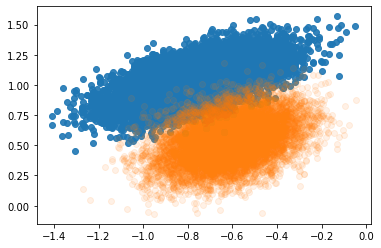

In [19]:
dim_1=1
dim_2=2
plt.scatter(x = cluster_data[:10000,dim_1], y = cluster_data[:10000,dim_2],alpha=0.9)
plt.scatter(x = cluster_data[10000:,dim_1], y = cluster_data[10000:,dim_2],alpha=0.1)

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=2).fit(cluster_data)
pred = km.predict(cluster_data)

cluster_data[pred==1][:,0]

array([0.64241405, 1.10427222, 0.57091318, ..., 1.04592445, 0.64789706,
       0.9107083 ])

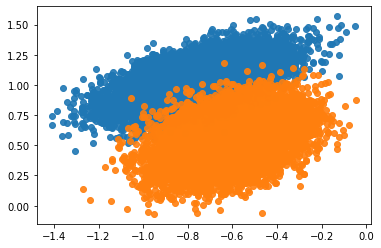

In [22]:
plt.scatter(x = cluster_data[pred==0][:,dim_1], y = cluster_data[pred==0][:,dim_2],alpha=0.9)
plt.scatter(x = cluster_data[pred==1][:,dim_1], y = cluster_data[pred==1][:,dim_2],alpha=0.9)

In [11]:
def append_random_features(clust_data, n_dim=5):
    new_data = np.hstack([clust_data, np.random.uniform(-2,2,size=(20000,n_dim))])
    new_pred = KMeans(n_clusters=2).fit_predict(new_data)
    
    point1 = new_data[:10000].mean(axis=0)
    point2 = new_data[10000:].mean(axis=0)
    dist = np.linalg.norm(point1 - point2)
    
    return new_data, new_pred, dist/np.sqrt(new_data.shape[1])


In [12]:
data_20, pred_20, dist_20 = append_random_features(clust_data=cluster_data, n_dim=15)
data_50, pred_50, dist_50 = append_random_features(clust_data=cluster_data, n_dim=45)
data_100, pred_100, dist_100 = append_random_features(clust_data=cluster_data, n_dim=95)
data_200, pred_200, dist_200 = append_random_features(clust_data=cluster_data, n_dim=195)
data_500, pred_500, dist_500 = append_random_features(clust_data=cluster_data, n_dim=495)
data_1000, pred_1000, dist_1000 = append_random_features(clust_data=cluster_data, n_dim=995)

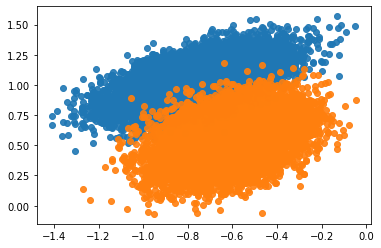

In [23]:
plt.scatter(x = data_1000[pred_1000==0][:,dim_1], y = data_1000[pred_1000==0][:,dim_2],alpha=0.9)
plt.scatter(x = data_1000[pred_1000==1][:,dim_1], y = data_1000[pred_1000==1][:,dim_2],alpha=0.9)

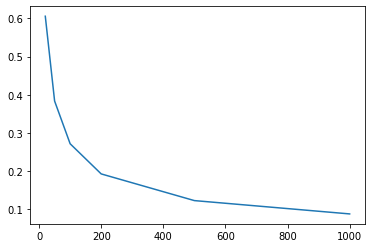

In [24]:
counts = [20,50,100,200,500,1000]
dist = [dist_20, dist_50, dist_100, dist_200, dist_500, dist_1000]
plt.plot(counts, dist)

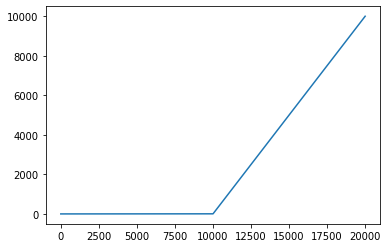

In [69]:
plt.plot(pred_500.cumsum())
